# Dataset 
## 2021-09-02-mCherryRAW-collagen\second-tiling-10x10-mCherry-only
collagen embedded mchy-RAW264.7 in 3D printed grid, tile green channel.



go to the data folder on LC

`getconda
conda activate llsmvis
scp /g/g92/yi10/llsmvis/tools/getdsk .
chmod u+rwx ./getdsk
./getdsk`



In [43]:
result_folder='/p/lscratchh/yi10/llsm-data/2021-09-02-mCherryRAW-collagen/second-tiling-10x10-mCherry-only/results_dsk'
position_path='/p/lscratchh/yi10/llsm-data/2021-09-02-mCherryRAW-collagen/second-tiling-10x10-mCherry-only/Positions.csv'


In [81]:
import os
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv

In [4]:
# need to write something to tile the XY tiles into a big image.

In [123]:
def stitch_10x10_tiles(xymip_list):
    tiled = [];
    return tiled

def read_a_tile_MIPxy(MIPs_all, tile_ind):
    arr = io.imread(MIPs_all[0][tile_ind])
    return arr

def get_paths_to_MIPs_sorted(result_folder):
    mipsall=[]
    for mipstr in ['MIP_channel0_XY.tif', 'MIP_channel0_XZ.tif', 'MIP_channel0_YZ.tif']:
        mips=[]
        tile_folders = [f for f in os.listdir(result_folder) if os.path.isfile(os.path.join(result_folder, f, mipstr)) and f.startswith('Tile')]
        for i in np.arange(0,len(tile_folders)):
            x=[g for g in tile_folders if g.startswith('Tile'+str(i)+'_')]
            mips.append(os.path.join(result_folder, x[0], mipstr))
        mipsall.append(mips)
    return mipsall

def plt_nxm_tiles_MIPxy(xyMIPs_paths,n=5,m=5,ttstr=True,vmin=0,vmax=4000):
    plt.figure(figsize=(20,20))
    for xind in np.arange(0,n):
        for yind in np.arange(0,m):
            ind = yind + xind*n
            arr = io.imread(xyMIPs_paths[0][ind])
            plt.subplot(n,m,ind+1)
            plt.imshow(np.flipud(arr.T),vmin=vmin,vmax=vmax)
            if ttstr:
                plt.title('Tile '+str(ind))
            plt.axis('off')

def plt_nxm_tiles_MIPs_XZ(MIPs,n=5,m=5):
    plt.figure(figsize=(15,5))
    for xind in np.arange(0,n):
        for yind in np.arange(0,m):
            ind = yind + xind*n
            arr = io.imread(MIPs[ind])
            plt.subplot(n, m, ind+1)
            plt.imshow(np.flipud(arr))
            plt.title('(XZ mip) Tile '+str(ind))
            plt.axis('off')


def plt_nxm_tiles_MIPs_YZ(MIPs, n=5, m=5):
    plt.figure(figsize=(15,5))
    for xind in np.arange(0,n):
        for yind in np.arange(0,m):
            ind = yind + xind*n
            arr = io.imread(MIPs[ind])
            plt.subplot(n,m,ind+1)
            plt.imshow(np.flipud(arr))
            plt.title('(YZ mip) Tile '+str(ind))
            plt.axis('off')

def plot_a_tile(tile_ind,MIPs_all,vmin=0,vmax=4000):
    plt.figure(figsize=(15,15))
    arr1 = io.imread(MIPs_all[0][tile_ind])
    arr2 = io.imread(MIPs_all[1][tile_ind])
    arr3 = io.imread(MIPs_all[2][tile_ind])
    plt.imshow(np.flipud(arr1.T),vmin=vmin,vmax=vmax)
    plt.title('(XY mip) Tile '+str(tile_ind))
    plt.axis('off')
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,1,1)
    plt.imshow((arr2))
    plt.title('(XZ mip) Tile '+str(tile_ind))
    plt.axis('off')
    
    plt.subplot(2,1,2)
    plt.imshow(np.flipud(arr3))
    plt.title('(YZ mip) Tile '+str(tile_ind))
    plt.axis('off')

def plot_two_tiles(tile_inda, tile_indb, MIPs_all,vmin=0,vmax=4000):
    plt.figure(figsize=(15,15))
    a1 = io.imread(MIPs_all[0][tile_inda])
    a2 = io.imread(MIPs_all[1][tile_inda])
    a3 = io.imread(MIPs_all[2][tile_inda])
    b1 = io.imread(MIPs_all[0][tile_indb])
    b2 = io.imread(MIPs_all[1][tile_indb])
    b3 = io.imread(MIPs_all[2][tile_indb])
    plt.subplot(1,2,1)
    plt.imshow(np.flipud(a1.T),vmin=vmin,vmax=vmax)
    plt.title('(XY mip) Tile '+str(tile_inda))
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(np.flipud(b1.T),vmin=vmin,vmax=vmax)
    plt.title('(XY mip) Tile '+str(tile_indb))
    plt.axis('off')
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,1,1)
    plt.imshow((a2))
    plt.title('(XZ mip) Tile '+str(tile_inda))
    plt.axis('off')
    plt.subplot(2,1,2)
    plt.imshow((b2))
    plt.title('(XZ mip) Tile '+str(tile_indb))
    plt.axis('off')
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,1,1)
    plt.imshow(np.flipud(a3))
    plt.title('(YZ mip) Tile '+str(tile_inda))
    plt.axis('off')    
    plt.subplot(2,1,2)
    plt.imshow(np.flipud(b3))
    plt.title('(YZ mip) Tile '+str(tile_indb))
    plt.axis('off')

def export_cell_positions(ps):
    with open(result_folder + '/Chosen_positions.csv', mode='w') as f:
        writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        writer.writerow(['Name', 'X (mm)', 'Y (mm)', 'Z (mm)'])
        writer.writerow(['Center', '8', '8', '20.1'])
        writer.writerow(['','','',''])   
        for ind, p in enumerate(ps_chosen):
            writer.writerow(['Position --- cell '+str(ind),p[0],p[1],p[2]])
        writer.writerow(['','','',''])   


In [16]:
MIPs_paths=get_paths_to_MIPs_sorted(result_folder)

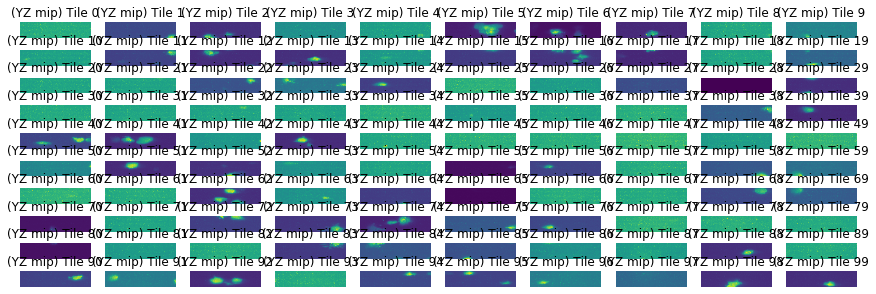

In [9]:
plt_nxm_tiles_MIPs_YZ(MIPs_paths[2],n=10,m=10)

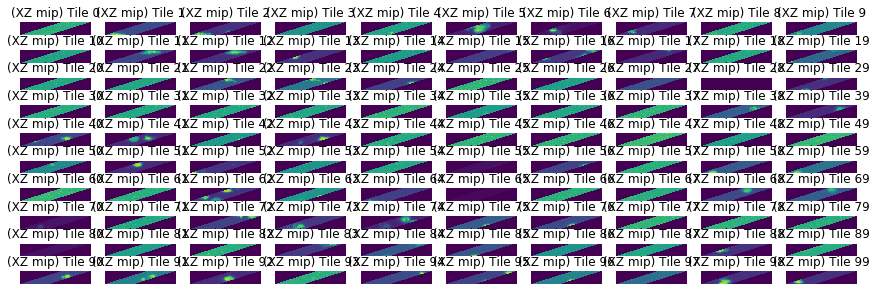

In [10]:
plt_nxm_tiles_MIPs_XZ(MIPs_paths[1],n=10,m=10)

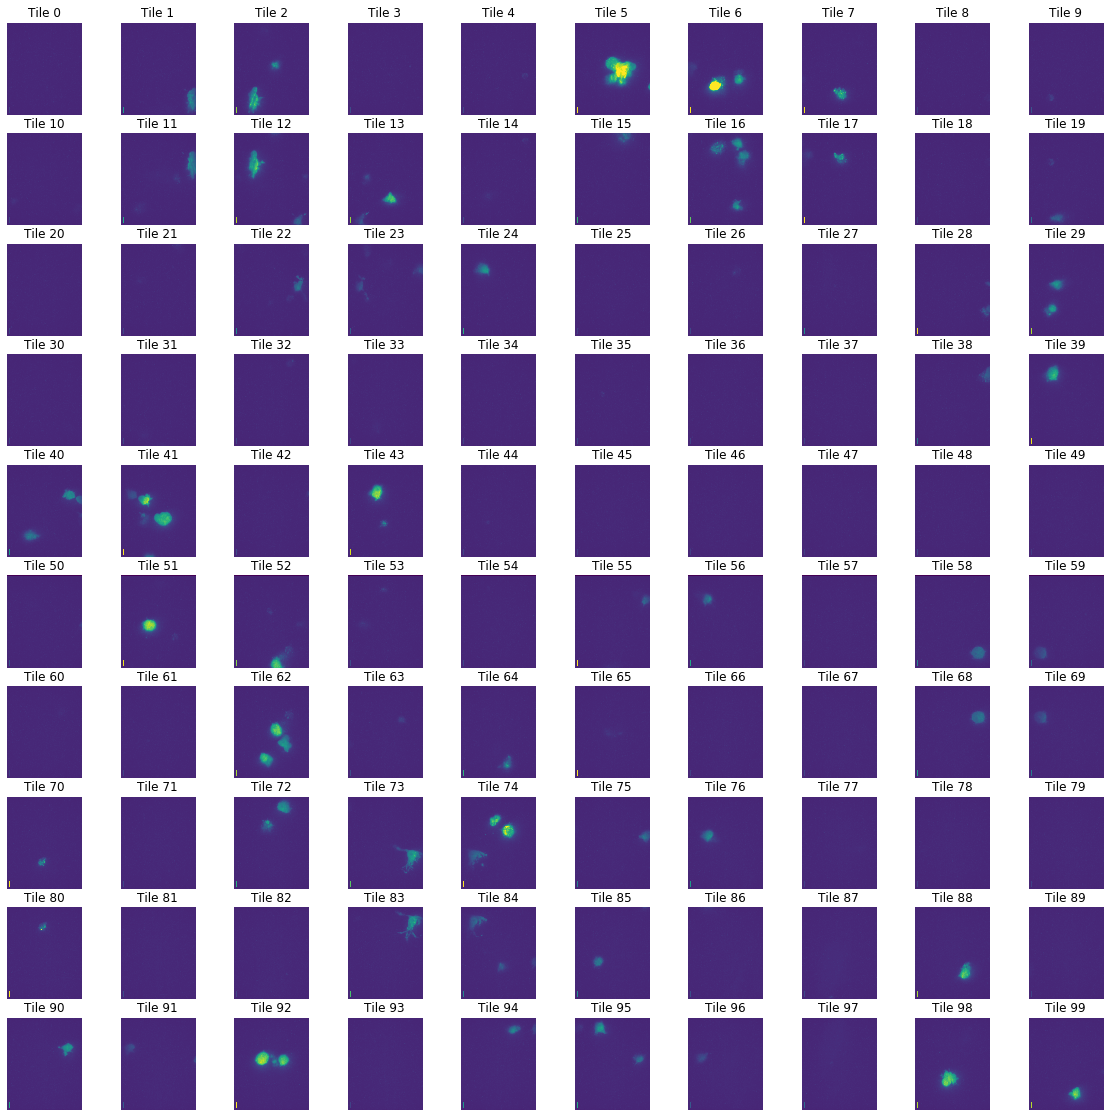

In [27]:
plt_nxm_tiles_MIPxy(MIPs_paths,n=10,m=10,ttstr=True,vmin=0,vmax=1000)

In [1]:
tinds=[2,5,6,7,13,16,24,29,39,40,41,43,51,52,58,62,64,68,69,72,73,74,76,85,88,90,92,94,95,98,99]








In [8]:
tinds[20]

73

In [125]:
ps=pd.read_csv(position_path)

In [126]:
ps

Name  X (mm)  Y (mm)   Z (mm)
0                   Center  8.0000  8.0000  19.7500
1                 corner 1  8.4460  8.5080  19.7354
2                 corner 2  7.9328  8.8475  19.7354
3                 corner 3  7.6374  8.3943  19.7354
4                 corner 4  8.0728  8.0405  19.7354
..                     ...     ...     ...      ...
108   Position --- Tile 98  8.2800  8.2100  19.9000
109   Position --- Tile 99  8.2800  8.2800  19.9000
110                   Bead  9.3798  9.7053  19.8230
111               Bead Top  9.3798  9.7053  20.0000
112  Bead leveled to tiles  9.3798  9.7053  19.9000

[113 rows x 4 columns]

In [127]:
ps_chosen=[]
for i in tinds:
    x=np.float(ps.loc[ps['Name']=='Position --- Tile '+str(i)]['X (mm)'])
    y=np.float(ps.loc[ps['Name']=='Position --- Tile '+str(i)]['Y (mm)'])
    z=np.float(ps.loc[ps['Name']=='Position --- Tile '+str(i)]['Z (mm)'])
    ps_chosen.append([x,y,z])

In [128]:
export_cell_positions(ps)

In [129]:
ps2=pd.read_csv(result_folder + '/Chosen_positions.csv')


In [130]:
ps=ps.set_index([np.arange(len(ps))+34])

In [131]:
a=pd.concat([ps2,ps])

In [133]:
a.to_csv(result_folder + '/Positions_with_cell_pos.csv',index=False)

In [94]:
len(ps_chosen)
ps.to_csv(result_folder + '/Chosen_positions.csv', mode='a', header=False)

In [95]:
l=pd.read_csv(result_folder + '/Chosen_positions.csv')

ParserError: Error tokenizing data. C error: Expected 4 fields in line 36, saw 5


In [92]:
l.head()

Name  X(mm)  Y(mm)  Z(mm)
0               Center   8.00   8.00   20.1
1                  NaN    NaN    NaN    NaN
2  Position --- cell 0   7.65   7.79   19.9
3  Position --- cell 1   7.65   8.00   19.9
4  Position --- cell 2   7.65   8.07   19.9

In [93]:
ps.head()

Name  X (mm)  Y (mm)   Z (mm)
0    Center  8.0000  8.0000  19.7500
1  corner 1  8.4460  8.5080  19.7354
2  corner 2  7.9328  8.8475  19.7354
3  corner 3  7.6374  8.3943  19.7354
4  corner 4  8.0728  8.0405  19.7354

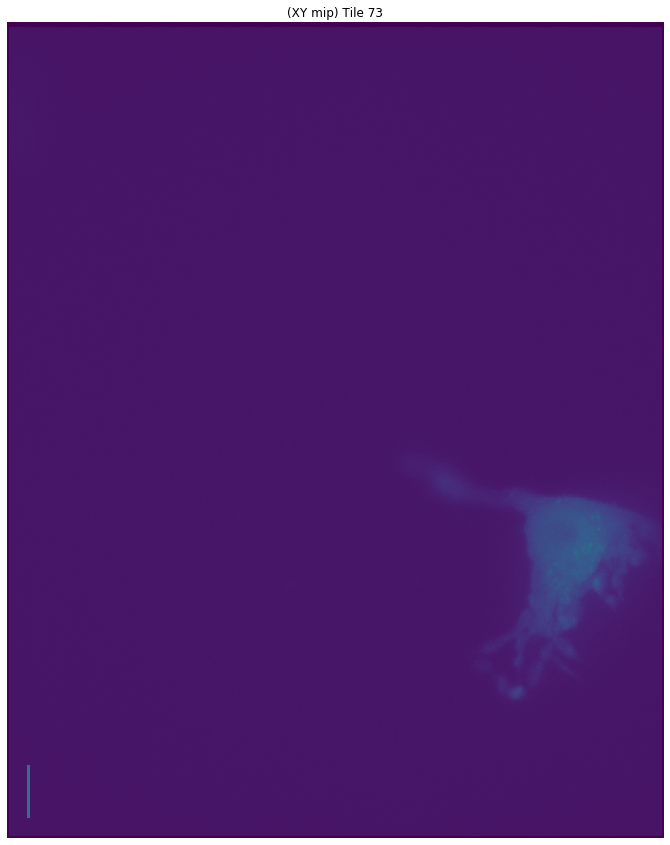

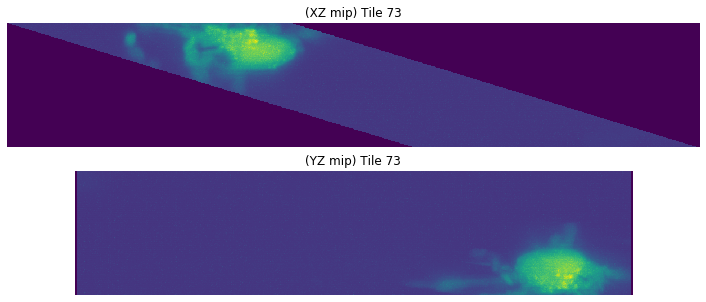

In [26]:
plot_a_tile(73,MIPs_paths,vmin=0,vmax=2000)

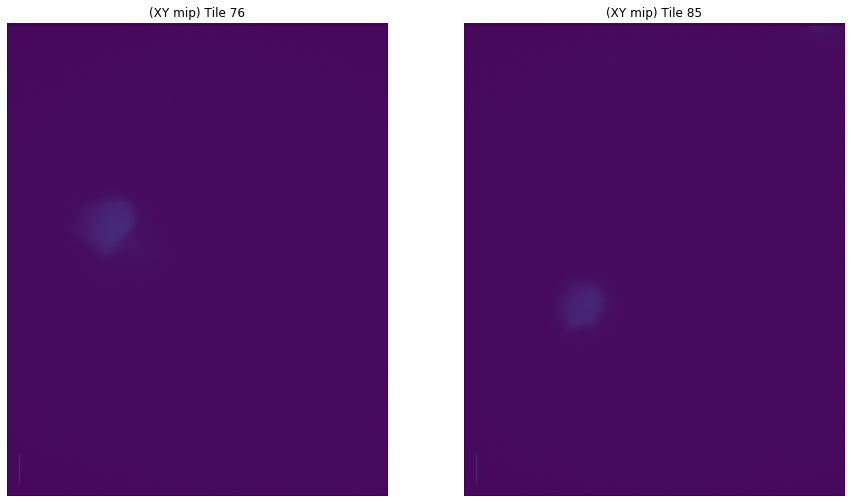

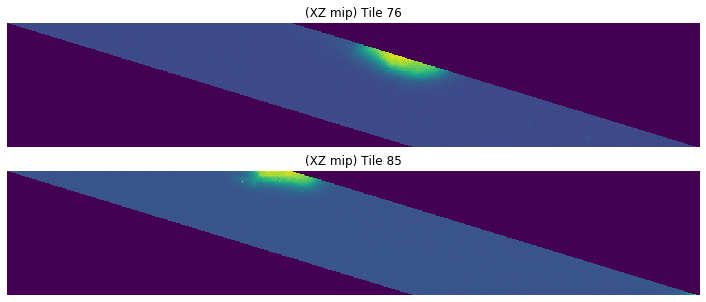

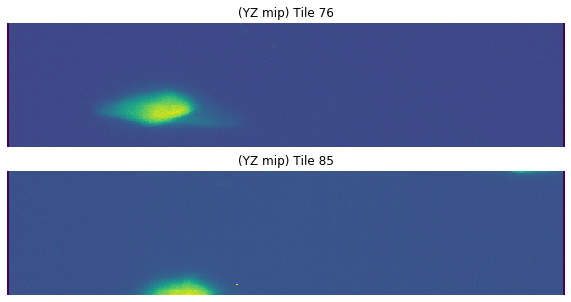

In [72]:
plot_two_tiles(76,85,MIPs_paths)

In [33]:
def stitch_UD(U,D,du,dd,overlap=True,showim=False, choosemax=True,vmin=0,vmax=4000):
    dimU=U.shape
    dimD=D.shape
    if overlap is True:
        M=np.zeros([dimU[0]+dimD[0]-du-dd, dimU[1]])
        M[0:dimU[0],:]=M[0:dimU[0],:]+U
        M[-dimD[0]:,:]=M[-dimD[0]:,:]+D
    elif choosemax is True:
        M=np.zeros([dimU[0]+dimD[0]-du-dd, dimU[1]])
        M[0:dimU[0],:]=M[0:dimU[0],:]+U
        M[-dimD[0]:,:]=np.maximum(M[-dimD[0]:,:],D)
        print('choose max')
    else:
        M=np.concatenate([U[0:-du,:],D[dd:,:]])
        
    if showim is True:
        plt.figure(figsize=(15,15))
        plt.imshow(M,vmin=vmin,vmax=vmax)
        
    return M

def stitch_10x10_XY(ts,du1,dd1, du2,dd2, overlap=True, showim=True, choosemax=True):
    Ts=[]
    for row_ind in np.arange(10): # stitch every row and store in Ts
        U=ts[0+row_ind*10][3:-2]
        D=ts[1+row_ind*10][3:-2]
        D2=ts[2+row_ind*10][3:-2]
        D3=ts[3+row_ind*10][3:-2]
        D4=ts[4+row_ind*10][3:-2]
        D5=ts[5+row_ind*10][3:-2]
        D6=ts[6+row_ind*10][3:-2]
        D7=ts[7+row_ind*10][3:-2]
        D8=ts[8+row_ind*10][3:-2]
        D9=ts[9+row_ind*10][3:-2]
        U2=stitch_UD(U,D,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U3=stitch_UD(U2,D2,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U4=stitch_UD(U3,D3,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U5=stitch_UD(U4,D4,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U6=stitch_UD(U5,D5,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U7=stitch_UD(U6,D6,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U8=stitch_UD(U7,D7,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        U9=stitch_UD(U8,D8,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        T=stitch_UD(U9,D9,du=du1,dd=dd1, overlap=overlap, showim=False, choosemax=choosemax)
        Ts.append(T)
    
    U=np.flipud(Ts[0].T)
    D=np.flipud(Ts[1].T)
    D2=np.flipud(Ts[2].T)
    D3=np.flipud(Ts[3].T)
    D4=np.flipud(Ts[4].T)
    D5=np.flipud(Ts[5].T)
    D6=np.flipud(Ts[6].T)
    D7=np.flipud(Ts[7].T)
    D8=np.flipud(Ts[8].T)
    D9=np.flipud(Ts[9].T)
    U2=stitch_UD(U,D,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U3=stitch_UD(U2,D2,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U4=stitch_UD(U3,D3,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U5=stitch_UD(U4,D4,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U6=stitch_UD(U5,D5,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U7=stitch_UD(U6,D6,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U8=stitch_UD(U7,D7,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    U9=stitch_UD(U8,D8,du=du2,dd=dd2, overlap=overlap, showim=False, choosemax=choosemax)
    T10x10=stitch_UD(U9,D9,du=du2,dd=dd2, overlap=overlap, showim=showim, choosemax=choosemax)
    return T10x10

choose max


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

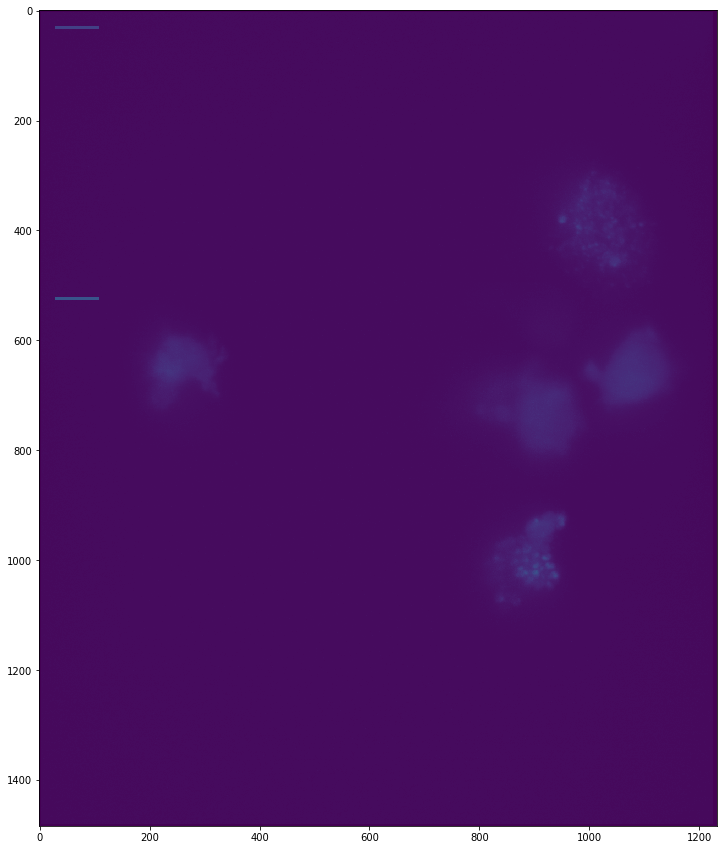

In [34]:
U=read_a_tile_MIPxy(MIPs_paths, 16)
D=read_a_tile_MIPxy(MIPs_paths, 17)

stitch_UD(U,D,du=250,dd=250,overlap=False,showim=True, choosemax=True)


In [35]:
ts=[read_a_tile_MIPxy(MIPs_paths, x) for x in np.arange(100)]


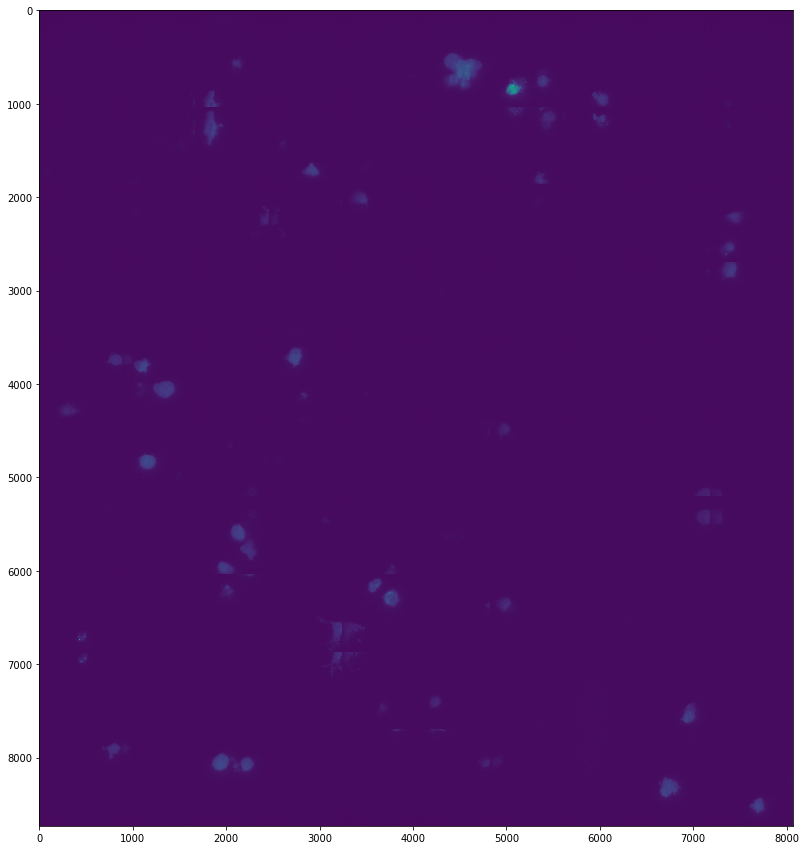

In [36]:
T=stitch_10x10_XY(ts,du1=100,dd1=100, du2=200, dd2=200, overlap=False, showim=True, choosemax=False)

In [110]:
csvpath='/p/lscratchh/yi10/llsm-data/2021-08-27-to-29-image-with-grid-col-RAW/actual_acquisition_positions.csv'

In [111]:
T.shape

(7830, 8390)